In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath('..'))

import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

np.random.seed(4)
from scipy.stats import norm
from hola.algorithm import HOLA

In [2]:
params_config = {
    "x":{
        "min":-1.0,
        "max":1.0,
    }
}

objectives_config = {
    "f":{
        "target":-1.0,
        "limit":10.0,
        "priority":2.0
    }
}

In [3]:
def func(x):
    return x**2 + 0.1*np.sin(2*np.pi*4*x) + 0.1*np.sin(2*np.pi*10*x)

In [4]:
def run(x):
    
    f = func(x)
    
    return {"f":f}

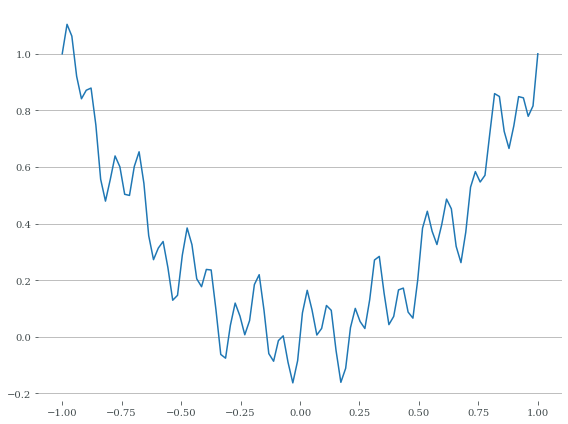

In [5]:
X = np.linspace(-1,1,100)
F = func(X)

plt.figure(figsize=(8,6))
plt.plot(X,F)
plt.show()

In [6]:
hola = HOLA(params_config, objectives_config, min_samples=10, top_frac=0.35)

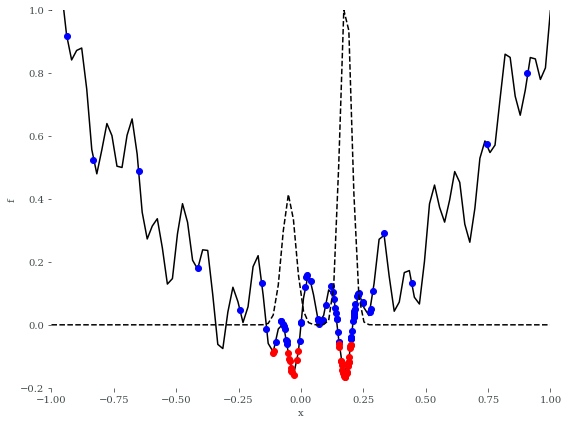

In [7]:
N = 100


fig = plt.figure(figsize=(8,6))
plt.grid(False)
#plt.title("Portfolio IR")
plt.xlabel("x")
plt.ylabel("f")
#plt.colorbar()
plt.ylim(-0.2,1.0)
plt.xlim(-1.0,1.0)
ims = []

for t in range(N):
    p = hola.sample()
    f = run(**p)
    
    hola.add_run(f,p)
    
    
    ### image
    if t >= 2:
        keys = hola.leaderboard.sorted_keys
        P = [hola.leaderboard.params[k]['x'] for k in keys]
        O = [hola.leaderboard.objectives[k]['f'] for k in keys]

        n = len(P)
        n_elite = int(n*hola.top_frac)

        im = plt.plot(X,F, color='k')
        im1 = plt.plot(P[n_elite:],O[n_elite:], marker='o', linestyle='', color='b')
        im2 = plt.plot(P[:n_elite],O[:n_elite], marker='o', linestyle='', color='r')

        #pdf
        weights = hola.sampler_exploit.gmm.weights_
        means = 2*np.ravel(hola.sampler_exploit.gmm.means_)-1
        vars = np.ravel(hola.sampler_exploit.gmm.covariances_)

        K = len(means)
        d = 0
        for i in range(K):
            d += weights[i]*norm.pdf(X, loc=means[i], scale=vars[i]**0.5)

        d = d/np.amax(d)
        if t<=10:
            d[:] = 0.5
        im3 = plt.plot(X,d, color='k', linestyle='--')

        
        ims.append(im+im1+im2+im3)

ani = animation.ArtistAnimation(fig, ims, interval=20, blit=True,
                                repeat_delay=0, repeat=True)
writer = PillowWriter(fps=3)
ani.save("./results/1d_example.gif", writer=writer)

plt.show()

In [8]:
means

array([ 0.17996053, -0.0481106 , -0.05077656])

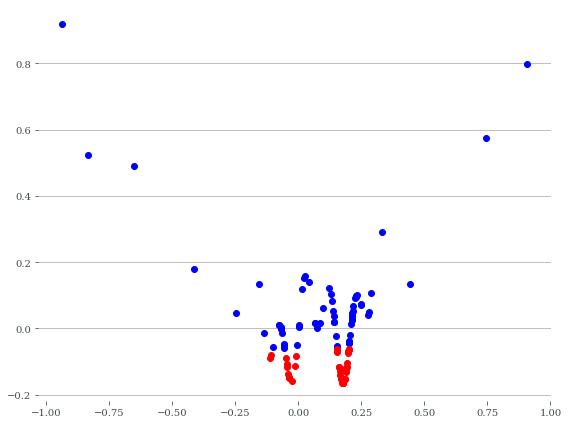

In [9]:
keys = hola.leaderboard.sorted_keys
P = [hola.leaderboard.params[k]['x'] for k in keys]
O = [hola.leaderboard.objectives[k]['f'] for k in keys]

n = len(P)
n_elite = int(n*hola.top_frac)

plt.figure(figsize=(8,6))
plt.plot(P[n_elite:],O[n_elite:], marker='o', linestyle='', color='b')
plt.plot(P[:n_elite],O[:n_elite], marker='o', linestyle='', color='r')

plt.show()

In [10]:
weights = hola.sampler_exploit.gmm.weights_
weights

array([0.6856782 , 0.28164605, 0.03267575])

In [11]:
means = np.ravel(hola.sampler_exploit.gmm.means_)
means

array([0.58998026, 0.4759447 , 0.47461172])

In [12]:
vars = np.ravel(hola.sampler_exploit.gmm.covariances_)
vars

array([0.00055149, 0.00075663, 0.0007813 ])

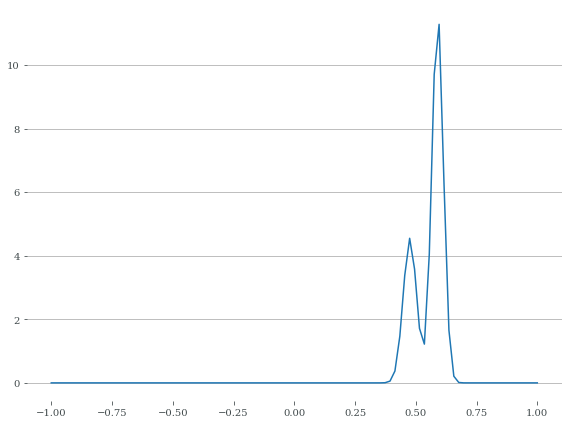

In [13]:
K = len(means)
d = 0
for i in range(K):
    d += weights[i]*norm.pdf(X, loc=means[i], scale=vars[i]**0.5)

plt.figure(figsize=(8,6))
plt.plot(X,d)
plt.show()